In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Problem 1
# input data Directory
dir = '/content/drive/My Drive/Colab Notebooks/ML Assignments/Assignment0'

# input data file
input_data = 'test.txt'

fp = open(dir + "/" + input_data,'r')

histogram = dict()
sorted_histogram = dict()
normalized_histogram = dict()
# create a dictionary for frequency of given input
for line in fp:
  for char in line.lower():
    if char.isalpha():
      if histogram.get(char) is None:
        histogram[char] = 1
      else:
        histogram[char] += 1
# sorting the dictionary
for i in sorted(histogram.keys()):
  sorted_histogram[i] = histogram[i]
# reformat into numpy array
result = sorted_histogram.items()
data = list(result)
histogramNumpyArray = np.array(data)

print(sorted_histogram)
print(histogramNumpyArray)

{'a': 44, 'b': 24, 'c': 23, 'd': 30, 'e': 63, 'f': 22, 'g': 23, 'h': 25, 'i': 56, 'j': 23, 'k': 22, 'l': 26, 'm': 22, 'n': 28, 'o': 50, 'p': 25, 'q': 22, 'r': 40, 's': 25, 't': 36, 'u': 38, 'v': 22, 'w': 22, 'x': 22, 'y': 27, 'z': 23}
[['a' '44']
 ['b' '24']
 ['c' '23']
 ['d' '30']
 ['e' '63']
 ['f' '22']
 ['g' '23']
 ['h' '25']
 ['i' '56']
 ['j' '23']
 ['k' '22']
 ['l' '26']
 ['m' '22']
 ['n' '28']
 ['o' '50']
 ['p' '25']
 ['q' '22']
 ['r' '40']
 ['s' '25']
 ['t' '36']
 ['u' '38']
 ['v' '22']
 ['w' '22']
 ['x' '22']
 ['y' '27']
 ['z' '23']]


In [10]:
# normalization
total = 0
for i in sorted_histogram.values():
  total += i

for i in sorted_histogram.keys():
  normalized_histogram[i] = histogram[i] / total

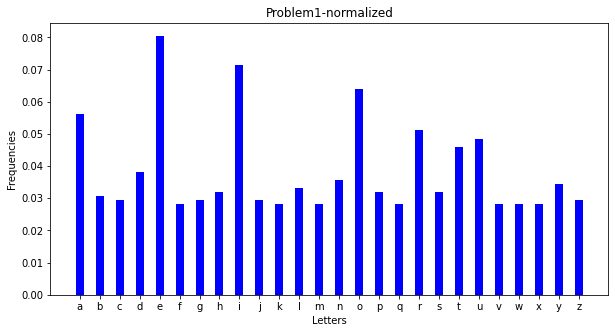

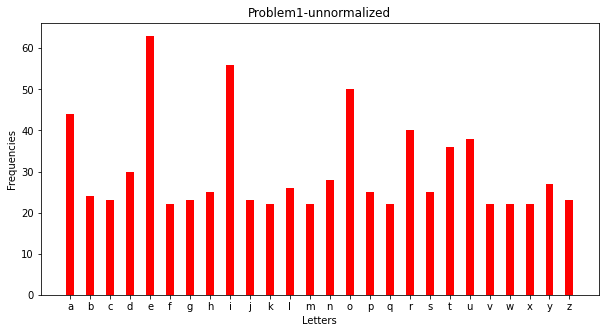

In [11]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar chart with normalized data
plt.bar(list(normalized_histogram.keys()), list(normalized_histogram.values()), color ='blue',
        width = 0.4)
plt.xlabel("Letters")
plt.ylabel("Frequencies")
plt.title("Problem1-normalized")
plt.show()
# creating the bar chart with unnormalized data
fig = plt.figure(figsize = (10, 5))
plt.bar(list(sorted_histogram.keys()), list(sorted_histogram.values()), color ='red',
        width = 0.4)
plt.xlabel("Letters")
plt.ylabel("Frequencies")
plt.title("Problem1-unnormalized")
plt.show()

In [12]:
# Problem 2
import cv2
from google.colab.patches import cv2_imshow
imageFile = "test.png" # 128 *128
img = cv2.imread(dir + "/" + imageFile)

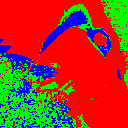

True

In [13]:
# red
point_one = np.array([255, 0, 0])
# green
point_two = np.array([0, 255, 0])
# blue
point_three = np.array([0, 0, 255])

new_img = list()
# determine which color(R,G,B) the current pixel is most close
for r in img:
  new_row = list()
  for c in r:
    nm_array = np.asarray(c)
    dist_one = np.sqrt(np.sum(np.square(point_one - nm_array)))
    dist_two = np.sqrt(np.sum(np.square(point_two - nm_array)))
    dist_three = np.sqrt(np.sum(np.square(point_three - nm_array)))
    if (dist_one <= dist_two and dist_one <= dist_three):
      new_row.append(point_one)
    elif (dist_two <= dist_one and dist_two <= dist_three):
      new_row.append(point_two)
    elif (dist_three <= dist_one and dist_three <= dist_two):
      new_row.append(point_three)
  new_img.append(new_row)

# show modified image
cv2_imshow(np.asarray(new_img))
# write output image
cv2.imwrite("output1.png", np.asarray(new_img))

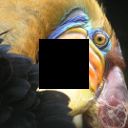

True

In [14]:
new_img_two = list()
# make 50*50 black square in the middle of the given image
for i, r in enumerate(img):
  new_row = list()
  if i > 38 and i < 89:
    for j, c in enumerate(r):
      if j > 38 and j < 89:
        new_row.append([0, 0, 0])
      else:
        new_row.append(c)
  else:
    new_row = r
  new_img_two.append(new_row)
# show modified image
cv2_imshow(np.asarray(new_img_two))
# write output image
cv2.imwrite("output2.png", np.asarray(new_img_two))

In [16]:
# problem 3

# Problem statement:
# You and a friend go to buy tacos. You get three soft tacos and three burritos and your total bill is $11.25. Your
# friend's bill is $10.00 for four soft tacos and two burritos. How much do soft tacos cost? How much do burritos cost?

# Me: 3 tacos and 3 burritos = $11.25 => 3t + 3b = 11.25
# Fr: 4 tacos and 2 burritos = $10.00 => 4t + 2b = 10.00
# 
# Columns of a are variable coefficients, rows are individual equations
a = np.array([[3, 3], [4, 2]])

# Column vector of equation equalities
b = np.array([[11.25], [10]])
# Check to ensure matrix is nonsingular
print(np.linalg.det(a))

# Solve
print(np.linalg.solve(a, b))

# The price of a Taco = 1.25
# The price of a Burrito = 2.5

-6.0
[[1.25]
 [2.5 ]]
